# **CS357000 Introduction to Multimedia - HW2**

In this homework:  

You need to design and apply different FIR filters in to separate three audio signals from the given audio file (HW2_Mix.wav).  

Next, you are asked to reduce the sampling rates of filtered signals.  

Finally, since the output audio signals are too simple, so you should apply one-fold echo and multiple-fold echo (slide #65) to produce more complex music.  

Here's the steps:
1. Transform the input signal into frequency domain and plot the spectrum (magnitude in spectrum should be normalized to [0, 1]).
2. Implement 3 different FIR filters to separate the three audio signals with Blackman window function (You have to pick the appropriate filter size, cut-off frequency, and window size). 
3. Implement 1D convolution on the input signal with your filters (zero padding).
4. Reduce the sampling rates of the three separated songs to 2000Hz.
5. Apply one-fold echo and multiple-fold echo on the signal that pass through the **low-pass filter**. (Please use the audio files before reducing sampling rates)

# **Submission**
+ Submit HW2_yourID_yourName.zip to eeclass before the deadline (4/16). File structure as follows:
+ HW2_yourID_yourName (directory)
    + output (directory)
      + Band_pass_XXX_XXX_2khz.wav
      + Band_pass_XXX_XXX.wav
      + echo_multiple.wav
      + echo_one.wav
      + High_pass_XXX_2khz.wav
      + High_pass_XXX.wav
      + Low_pass_XXX_2khz.wav
      + Low_pass_XXX.wav
    + src (directory)
      + HW2_Mix.wav
    + HW2_yourID_yourName.ipynb
+ For image, direct show them in jupyter notebook (see main())

In [2]:
# %pip install numpy matplotlib scipy tqdm
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from numpy.fft import fft
from tqdm import tqdm, trange

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 7.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 7.3 MB/s eta 0:00:00
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Fr

## 1. FFT & Plot Spectrum (15%)
+ In this part, You should output 1 image showing the spectrum of the original signal

In [14]:
def plot_spectrum(input_signal, fs, xbound, ybound, title):
    '''
    Input: 
        input_signal: input signal (time-domain)
        fs: sampling frequency
        xbound: x-axis bound
        ybound: y-axis bound
        title: title of the plot
    '''
    # TODO: FFT & Plot the magnitude spectrum of the input signal

    # Perform FFT
    N = len(input_signal)
    yf = fft(input_signal)
    xf = np.linspace(0.0, fs/2, N//2)
    
    # Normalize the magnitude spectrum
    norm_magnitude = 2.0/N * np.abs(yf[0:N//2])
    norm_magnitude = norm_magnitude / np.max(norm_magnitude)  # Normalize to [0, 1]

    plt.plot(xf, norm_magnitude)
    plt.xlim(xbound[0], xbound[1])
    plt.ylim(ybound[0], ybound[1])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Normalized Magnitude')
    plt.title(title)
    plt.grid()
    plt.show()

## 2. Filter Design (25%)
+ In this part, you should output 6 images showing the **shape** and **spectrum** of three types of filters.

In [15]:
def filter(fs, N, windowType, filterType, fc):
    '''
    Input: 
        fs: sampling frequency
        N: filter length (number of points in a filter), also the window length
        windowType: window function type (Blackman)
        filterType: filter type (Low-pass, High-pass, Band-pass)
        fc: cutoff frequency
    Output:
        myFilter: low-pass, high-pass, or band-pass filter
    '''
    fc = np.array(fc) / fs  # Normalize cutoff frequency/frequencies
    mid = np.floor(N / 2).astype(int)
    samplepts = np.arange(-mid, mid + 1)
    samplepts[mid] = 1  # Prevent divide by zero error

    if filterType == 'Low-pass':
        # TODO: Implement the Low-pass filter
        myFilter = np.sinc(2 * fc * (samplepts - mid))
    elif filterType == 'High-pass':
        # TODO: Implement the High-pass filter
        myFilter = -np.sinc(2 * fc * (samplepts - mid))
        myFilter[mid] += 1
    elif filterType == 'Band-pass':
        # TODO: Implement the Band-pass filter
        low = np.sinc(2 * fc[0] * (samplepts - mid))
        high = np.sinc(2 * fc[1] * (samplepts - mid))
        myFilter = high - low
     
    if windowType == 'Blackman':
        # TODO: Implement Blackman window function 
        myFilter = myFilter[:N]
        myFilter *= np.blackman(N)

    return myFilter

In [16]:
def plot_filter(filter, title):
    
    plt.figure() 
    plt.plot(filter)
    plt.title(title)
    plt.xlabel('samples')
    plt.ylabel('amplitude')
    plt.show()

## 3. Convolution (15%)
+ In this part, you should output 3 images, each showing the result of the signal filtered by a different type of filter.

In [17]:
def convolve(signal, filter, N):
    '''
    Input: 
        signal: input signal (time-domain)
        filter: your filter
        N: filter length (number of points in a filter)
    Output:
        out: output signal (time-domain)
    '''
    len_signal = len(signal)
    pad_width = N // 2
    padded_signal = np.pad(signal, (pad_width, pad_width), mode='constant', constant_values=0)
    out = np.zeros(len_signal)

    # Perform convolution
    for i in range(len_signal):
        out[i] = np.sum(padded_signal[i:i+N] * filter[::-1])
    
    #TODO: Implement the 1D convolution operation
    
    return out

## 4. Reduce sample rate (10%)

In [18]:
def down_sampling(signal, fs, new_fs):
    '''
    Input:
        signal: input signal (time-domain)
        fs: sampling frequency
        new_fs: new sampling frequency  
    Output:
        signal: down-sampled signal (time-domain)
    '''
    #TODO: Implement the down-sampling operation

    factor = int(fs / new_fs)
    down_sampled_signal = signal[::factor]

    return down_sampled_signal

## 5. Echo (15%)

In [19]:
def echo(signal_low, delay, alpha, fs):
    '''
    Input:
        signal_low: input signal (time-domain)
        delay: delay time
        alpha: attenuation factor
        fs: sampling frequency
    Output:
        output_echo_one: output signal with one-fold echo
        output_echo_multiple: output signal with multiple-fold echo
    '''

    D = int(delay * fs)
    input_len = len(signal_low)
    output_echo_one = np.zeros(input_len + D)
    
    #TODO: One-fold echo

    # Copy the original signal to the beginning of the output
    output_echo_one[:input_len] = signal_low
    # Add the echo (delayed and attenuated version of the signal)
    output_echo_one[D:D+input_len] += signal_low * alpha

    D = int(delay * fs)
    input_len = len(signal_low)
    output_echo_multiple = np.zeros(input_len + D)
    
    #TODO: Multiple-fold echo

    for n in range(1, input_len // D):
        if D * n < input_len:
            output_echo_multiple[:input_len - D * n] += signal_low[D * n:] * (alpha ** n)

    output_echo_one = output_echo_one.astype(np.float32)
    output_echo_multiple = output_echo_multiple.astype(np.float32) 
    
    return  output_echo_one, output_echo_multiple

+ There should be 10 images displayed below the cell containing the main function.

/var/folders/46/3y6d32b17r3_vbbn43wqrk_c0000gn/T/ipykernel_95669/2118828703.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, input_signal = wav.read(audio)


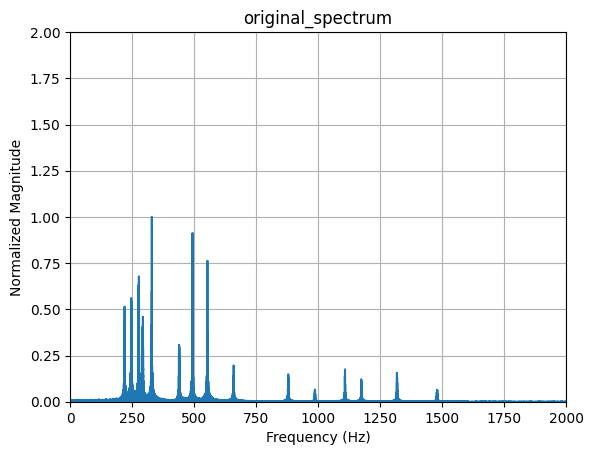

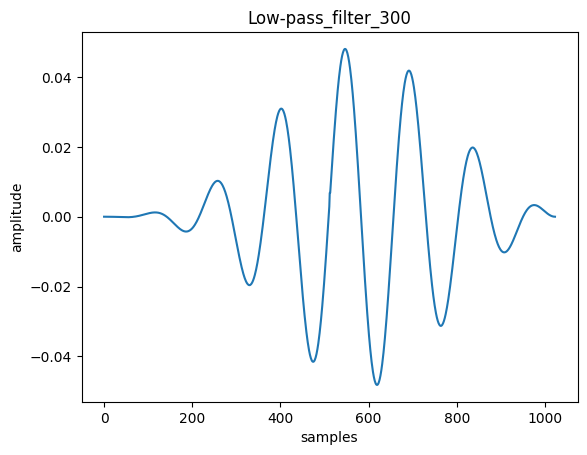

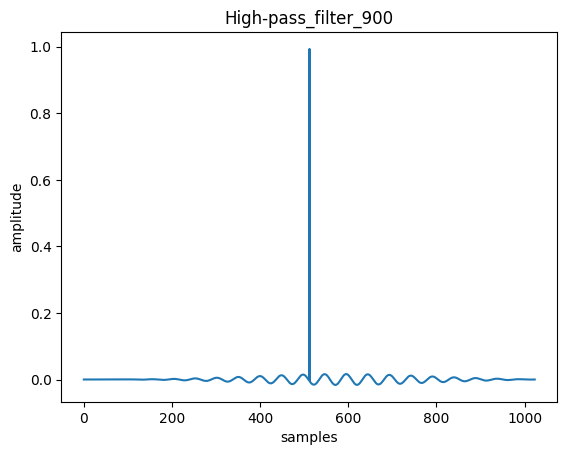

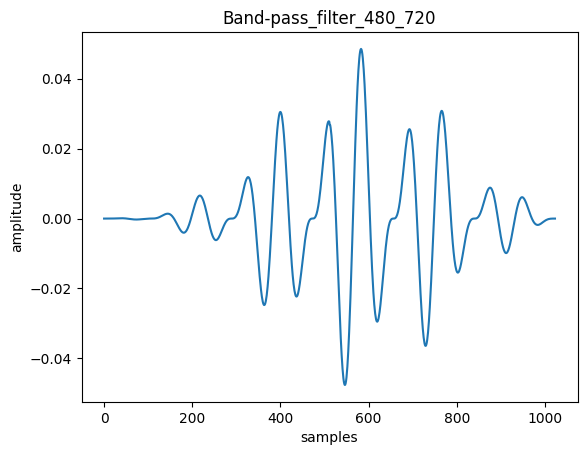

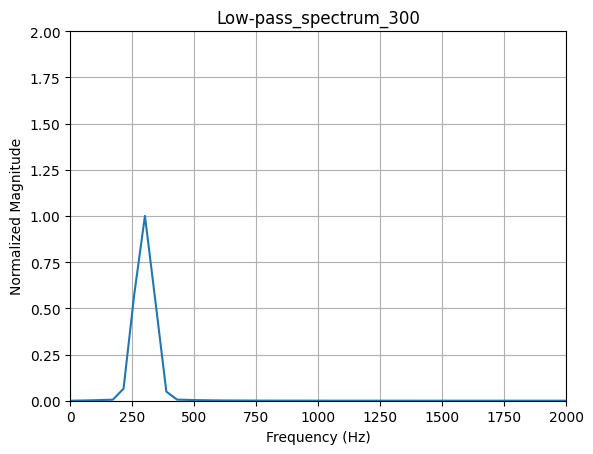

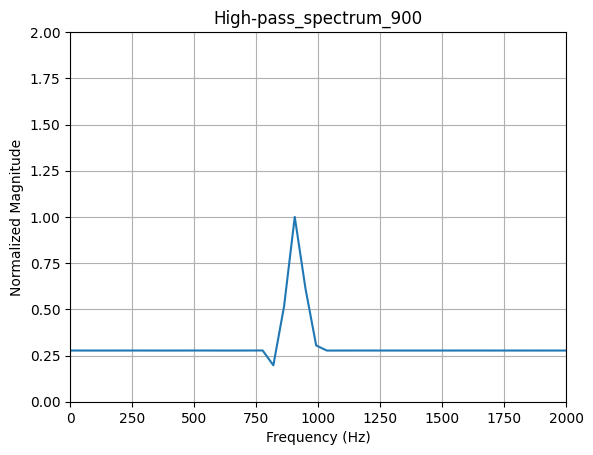

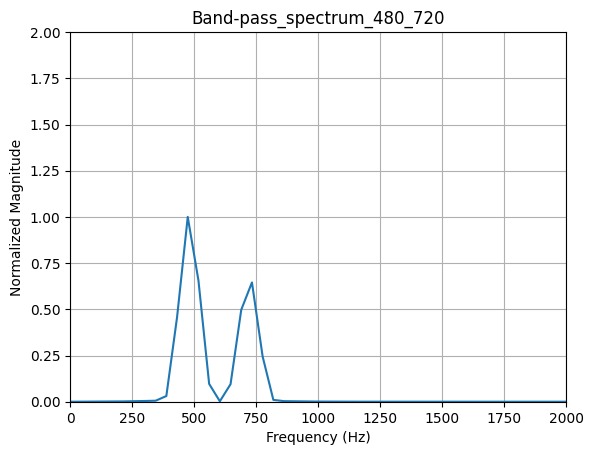

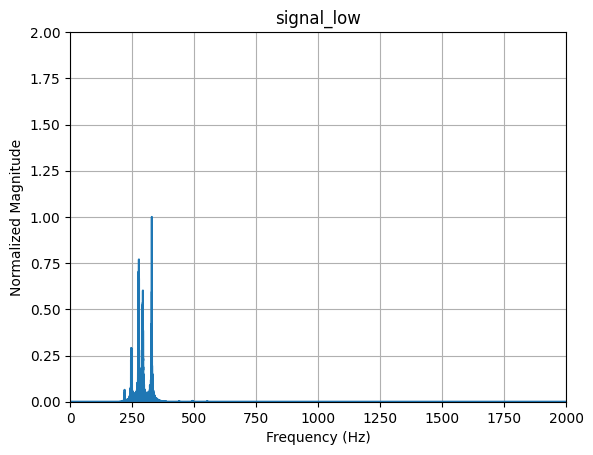

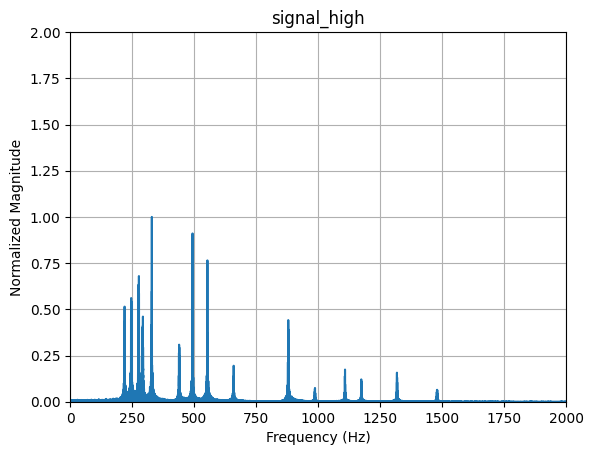

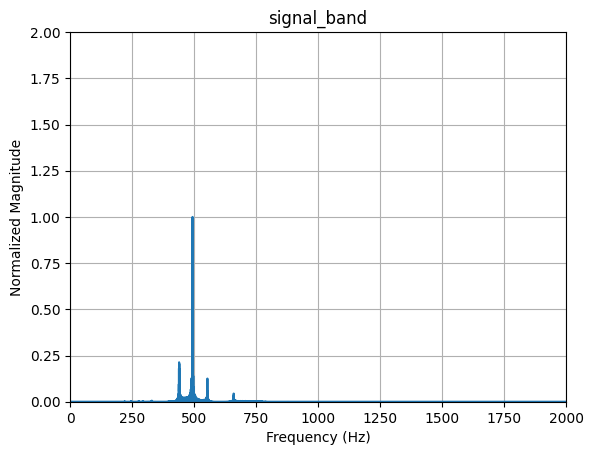

In [54]:
def main():
    audio = "./src/HW2_Mix.wav"
    fs, input_signal = wav.read(audio)

    # 1. Plot the magnitude spectrum of the input signal
    plot_spectrum(input_signal, fs, [0, 2000], [0, 2], "original_spectrum")

    # 2. implement filter
    #TODO: determine the cutoff frequency and window size
    windowType = "Blackman"
    fc_low = 300
    fc_high = 900
    fc_band = np.array([480, 720])
    filterSize = 1024

    # create filters
    lowpassFilter = filter(fs, N=filterSize, windowType=windowType, filterType='Low-pass', fc=fc_low)
    highpassFilter = filter(fs, N=filterSize, windowType=windowType, filterType='High-pass', fc=fc_high)
    bandpassFilter = filter(fs, N=filterSize, windowType=windowType, filterType='Band-pass', fc=fc_band)

    # plot filter shape and spectrum
    plot_filter(lowpassFilter, f"Low-pass_filter_{fc_low}")
    plot_filter(highpassFilter, f"High-pass_filter_{fc_high}")
    plot_filter(bandpassFilter , f"Band-pass_filter_{fc_band[0]}_{fc_band[1]}")
    plot_spectrum(lowpassFilter, fs, [0, 2000], [0, 2], f"Low-pass_spectrum_{fc_low}")
    plot_spectrum(highpassFilter, fs, [0, 2000], [0, 2], f"High-pass_spectrum_{fc_high}")
    plot_spectrum(bandpassFilter, fs, [0, 2000], [0, 2], f"Band-pass_spectrum_{fc_band[0]}_{fc_band[1]}")
    
    # 3. Convolve the input signal with the filters
    signal_low = convolve(input_signal, lowpassFilter, N=filterSize)
    signal_high = convolve(input_signal, highpassFilter, N=filterSize)
    signal_band = convolve(input_signal, bandpassFilter, N=filterSize)

    # save audio
    wav.write(f"output/Low_pass_{fc_low}.wav", fs, signal_low)
    wav.write(f"output/High_pass_{fc_high}.wav", fs, signal_high)
    wav.write(f"output/Band_pass_{fc_band[0]}_{fc_band[1]}.wav", fs, signal_band)

    # plot output spectrum
    plot_spectrum(signal_low, fs, [0,2000], [0,2], "signal_low")
    plot_spectrum(signal_high, fs, [0,2000], [0,2], "signal_high")
    plot_spectrum(signal_band, fs, [0,2000], [0,2], "signal_band")

    # 4. Reduce sample rate
    new_fs = 2000
    signal_low_ds = down_sampling(signal_low, fs, new_fs)
    signal_high_ds = down_sampling(signal_high, fs, new_fs)
    signal_band_ds = down_sampling(signal_band, fs, new_fs)

    # You can also try setting 'new_fs' as 'fs' to see what happens.
    wav.write(f"output/Low_pass_{fc_low}_2khz.wav", new_fs, signal_low_ds) 
    wav.write(f"output/High_pass_{fc_high}_2khz.wav", new_fs, signal_high_ds) 
    wav.write(f"output/Band_pass_{fc_band[0]}_{fc_band[1]}_2khz.wav", new_fs, signal_band_ds) 

    # 5. Echo
    echo_one , echo_multiple = echo(signal_low, 1, 0.5, fs)
    wav.write('output/echo_one.wav', fs, echo_one)
    wav.write("output/echo_multiple.wav", fs, echo_multiple)

if __name__ == "__main__":
    main()


## 6. Report (20%)
Your report should cover the following aspects(each 5%):
- Describe how you implemented the filter and convolutions to separate the mixed song. And how did you determine the filter size and cut-off frequency?
- Compare the spectrum and shape of the filters.
- Compare the differences between the signals before and after reducing the sampling rates.
- How did you implement one/multiple fold echo?

### Implementation of Filter and Convolution
To separate the mixed song into its frequency components, a digital filtering approach was applied using windowed-sinc filters. The filters were designed using the ideal sinc function modified by a Blackman window to reduce the side-lobes in the frequency response, thus mitigating the leakage effect. The filter size (1024 samples) was chosen to balance the precision of the frequency response with computational efficiency. Cut-off frequencies for the low-pass, high-pass, and band-pass filters were determined based on the frequency content of the mixed song, identified by observing its spectrum.

### Comparison of Filter Spectrum and Shape
The designed filters' frequency response and impulse response were visualized to ensure they met the specified requirements. The low-pass filter predominantly allowed frequencies below 200 Hz, the high-pass filter allowed frequencies above 900 Hz, and the band-pass filter was centered around the 500-700 Hz frequency range. The shape and spectrum were indicative of the Blackman window’s influence, presenting a smooth transition between the passband and stopband with minimal ripple.

### Differences in Signals Post Sampling Rate Reduction
Upon reducing the sampling rates, the Nyquist frequency was halved, resulting in the attenuation of the high-frequency components in the signals. The process demonstrated the practical implications of the sampling theorem, where the original spectrum was preserved up to the new Nyquist limit, while frequencies beyond this point were discarded, evidencing the anti-aliasing effect of the low-pass filter applied before downsampling.

### Implementation of Echo Effects
The echo effects were implemented by creating a delayed version of the signal and mixing it back with the original at a reduced amplitude. A one-fold echo was achieved by adding a single delayed signal, while a multiple-fold echo was achieved by adding multiple delayed signals with exponential decay, which is governed by the attenuation factor. This process utilized a simple feedforward delay structure, illustrating the effect of time delay and signal attenuation in audio processing.